# 거래량 데이터 크롤링

In [29]:
import requests
from bs4 import BeautifulSoup
import csv

page = 1
date_list = []
trading_volume_list = []

while 1:
    response1 = requests.get("https://finance.naver.com/item/sise_day.nhn?code=009830&page={}".format(page))
    bs1 = BeautifulSoup(response1.text)
    
    for data in bs1.find_all('tr', onmouseover='mouseOver(this)'):
        date = data.select('span.tah')[0].text
        trading_volume = int(data.select('span.tah')[6].text.replace(",", ""))
        
        if int(date.replace(".", "")) < 20150101:
            break
        
        print(date, trading_volume)

        date_list.append(date)
        trading_volume_list.append(trading_volume)

        
    if int(date.replace(".", "")) < 20150101:
        break

    print("------------------------------------------")
    print(str(page) + "페이지 완료")
    print("------------------------------------------")

    page += 1

.23 589940
2017.11.22 1524792
2017.11.21 904657
2017.11.20 603442
2017.11.17 719759
2017.11.16 1178656
2017.11.15 1169661
2017.11.14 841302
2017.11.13 1416123
2017.11.10 1280728
------------------------------------------
71페이지 완료
------------------------------------------
2017.11.09 895404
2017.11.08 856458
2017.11.07 1040904
2017.11.06 815870
2017.11.03 1072388
2017.11.02 2016089
2017.11.01 1859280
2017.10.31 1457352
2017.10.30 2251692
2017.10.27 1228748
------------------------------------------
72페이지 완료
------------------------------------------
2017.10.26 858174
2017.10.25 648535
2017.10.24 821613
2017.10.23 739142
2017.10.20 1215300
2017.10.19 1401836
2017.10.18 755489
2017.10.17 780672
2017.10.16 674152
2017.10.13 805308
------------------------------------------
73페이지 완료
------------------------------------------
2017.10.12 1750519
2017.10.11 1369561
2017.10.10 1345842
2017.09.29 610374
2017.09.28 968632
2017.09.27 845269
2017.09.26 1290109
2017.09.25 3879110
2017.09.22 1609451


In [30]:
import pandas  as pd
df = pd.DataFrame({"날짜": date_list, "거래량": trading_volume_list})
df

,날짜,거래량
0,2020.09.28,6763949
1,2020.09.25,6251598
2,2020.09.24,8931951
3,2020.09.23,7403683
4,2020.09.22,8160662
...,...,...
1408,2015.01.08,862475
1409,2015.01.07,856164
1410,2015.01.06,900084
1411,2015.01.05,1280258


In [31]:
df.to_csv(r'C:\Users\myhome\Desktop\개인 프로젝트\KBS_TEFN\trading_volume.csv', index=False)

In [74]:
df = pd.read_csv("trading_volume.csv", index_col = "날짜", parse_dates=True)
df = df.sort_index() # 정렬 sort_values()
df

,거래량
날짜,
2015-01-02,1246322
2015-01-05,1280258
2015-01-06,900084
2015-01-07,856164
2015-01-08,862475
...,...
2020-09-22,8160662
2020-09-23,7403683
2020-09-24,8931951


# 그래프 그리기

In [32]:
from matplotlib import font_manager as fm,rc
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=font_name)

In [95]:
# df.plot(xlim=['2015-01-01', '2020-09-28'],ylim=([0,23000000]))

In [96]:
idx = df.loc['2019-01-01':'2020-09-28'].index
idx

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-28'],
              dtype='datetime64[ns]', name='날짜', length=432, freq=None)

In [97]:
stock = df.loc['2019-01-01':'2020-09-28']['거래량']
stock

날짜
2019-01-02     765015
2019-01-03    1282979
2019-01-04     746255
2019-01-07     636467
2019-01-08     515389
               ...   
2020-09-22    8160662
2020-09-23    7403683
2020-09-24    8931951
2020-09-25    6251598
2020-09-28    6763949
Name: 거래량, Length: 432, dtype: int64

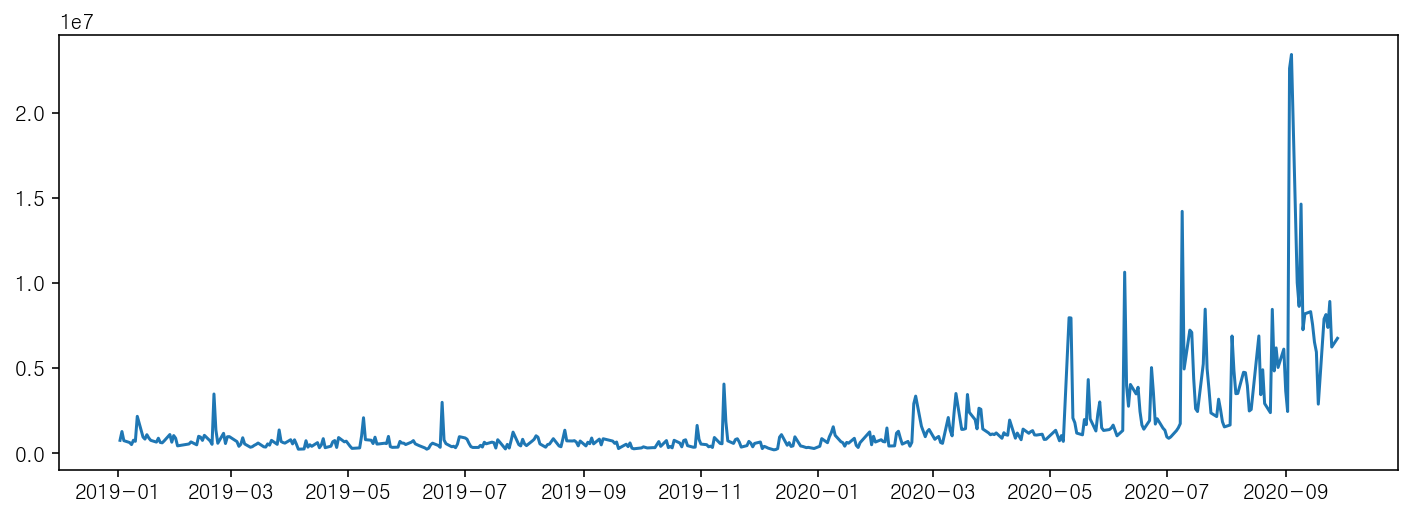

In [98]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot_date(idx, stock, '-')